###Merge Features



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /titanic/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /titanic/test.csv')
test_dataY = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /titanic/gender_submission.csv')

In [4]:
train_data.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis = 1, inplace = True)
test_data.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis = 1, inplace = True)


In [5]:
tr = train_data.copy()
te = test_data.copy()

In [6]:
train_data = tr.copy()
test_data = te.copy()

In [7]:
tr['Embarked'] = tr['Embarked'].fillna(tr['Embarked'].mode()[0])
te['Fare'] = te['Fare'].fillna(te['Fare'].mean())
tr['Age'] = tr['Age'].fillna(tr['Age'].mean())
te['Age'] = te['Age'].fillna(te['Age'].mean())

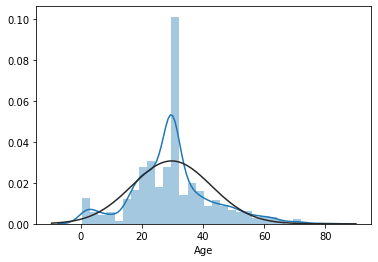

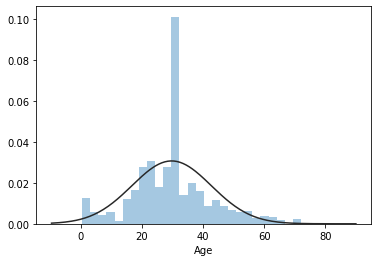

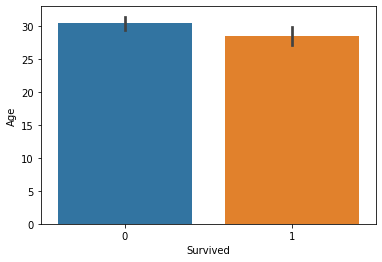

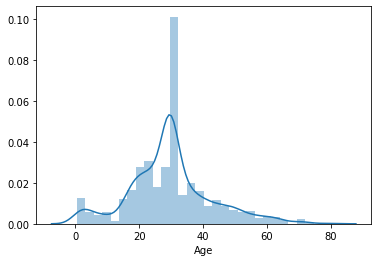

In [7]:
ax = sns.distplot(tr['Age'], fit=norm, kde=True)
plt.show()
ax = sns.distplot(tr['Age'], fit=norm, kde=False)
plt.show()
ax = sns.barplot(x="Survived", y="Age", data=tr)
plt.show()
ax = sns.distplot(tr['Age'])
plt.show()

In [8]:
experiment = tr.copy()

In [9]:
X = experiment[experiment['Survived'] == 1]
X2 = experiment[experiment['Survived'] == 0]
X2

Survived  Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.000000      1      0   7.2500        S
4           0       3    male  35.000000      0      0   8.0500        S
5           0       3    male  29.699118      0      0   8.4583        Q
6           0       1    male  54.000000      0      0  51.8625        S
7           0       3    male   2.000000      3      1  21.0750        S
..        ...     ...     ...        ...    ...    ...      ...      ...
884         0       3    male  25.000000      0      0   7.0500        S
885         0       3  female  39.000000      0      5  29.1250        Q
886         0       2    male  27.000000      0      0  13.0000        S
888         0       3  female  29.699118      1      2  23.4500        S
890         0       3    male  32.000000      0      0   7.7500        Q

[549 rows x 8 columns]

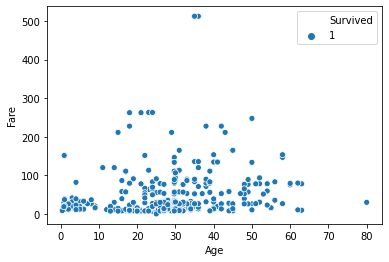

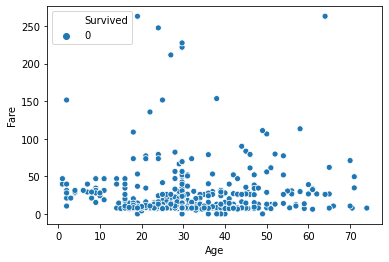

In [10]:
#sns.scatterplot(x='Age',y='Pclass',data=tr,hue='Survived')
sns.scatterplot(x='Age',y='Fare',data=X,hue='Survived')
plt.show()
sns.scatterplot(x='Age',y='Fare',data=X2,hue='Survived')
plt.show()

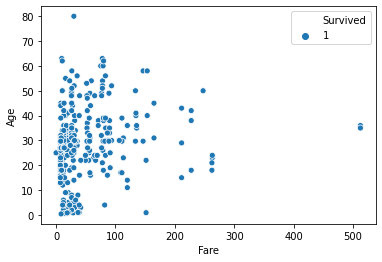

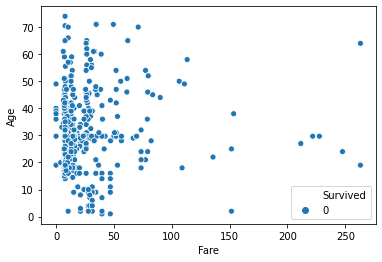

In [11]:
sns.scatterplot(x='Fare',y='Age',data=X,hue='Survived')
plt.show()
sns.scatterplot(x='Fare',y='Age',data=X2,hue='Survived')
plt.show()

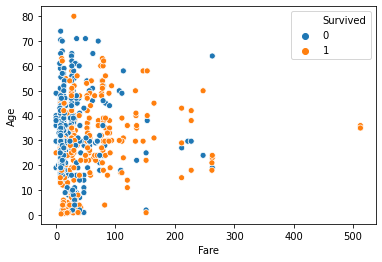

In [12]:
sns.scatterplot(x='Fare',y='Age',data=tr,hue='Survived')
plt.show()

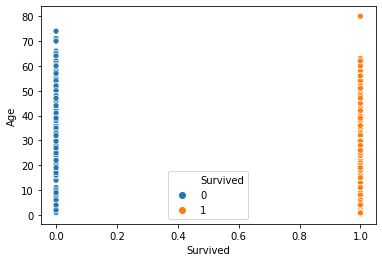

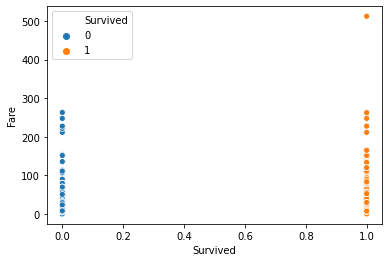

In [13]:
sns.scatterplot(x='Survived',y='Age',data=tr,hue='Survived')
plt.show()
sns.scatterplot(x='Survived',y='Fare',data=tr,hue='Survived')
plt.show()

In [10]:
genders = {"male": 1, "female": 2}
embarked = {"C": 1, "Q": 2, "S": 3}
data = [tr, te]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked)

In [11]:
temp = tr.copy()
tempT = te.copy()

In [91]:
#temp['SiPa'] = temp['SibSp']	+ temp['Parch']
#temp = temp.drop(['SibSp',	'Parch'],axis = 1)
#tempT['SiPa'] = tempT['SibSp']	+ tempT['Parch']
#tempT = tempT.drop(['SibSp',	'Parch'],axis = 1)

In [12]:
temp['Age_log'] = np.log(temp['Age']+1)
tempT['Age_log'] = np.log(tempT['Age']+1)
temp['Fare_log'] = np.log(temp['Fare']+1)
tempT['Fare_log'] = np.log(tempT['Fare']+1)
temp['SiPa'] = temp['SibSp']	+ temp['Parch']
tempT['SiPa'] = tempT['SibSp']	+ tempT['Parch']

In [113]:
temp.loc[temp['Age'] <= 20, 'Age'] = 1
temp.loc[(temp['Age'] > 20) & (temp['Age'] <= 40), 'Age'] = 2
temp.loc[temp['Age'] > 40, 'Age'] = 3

tempT.loc[tempT['Age'] <= 20, 'Age'] = 1
tempT.loc[(tempT['Age'] > 20) & (tempT['Age'] <= 40), 'Age'] = 2
tempT.loc[tempT['Age'] > 40, 'Age'] = 3

In [114]:
temp.loc[temp['Fare'] <= 50, 'Fare'] = 1
temp.loc[temp['Fare'] > 50, 'Fare'] = 2

tempT.loc[tempT['Fare'] <= 50, 'Fare'] = 1
tempT.loc[tempT['Fare'] > 50, 'Fare'] = 2

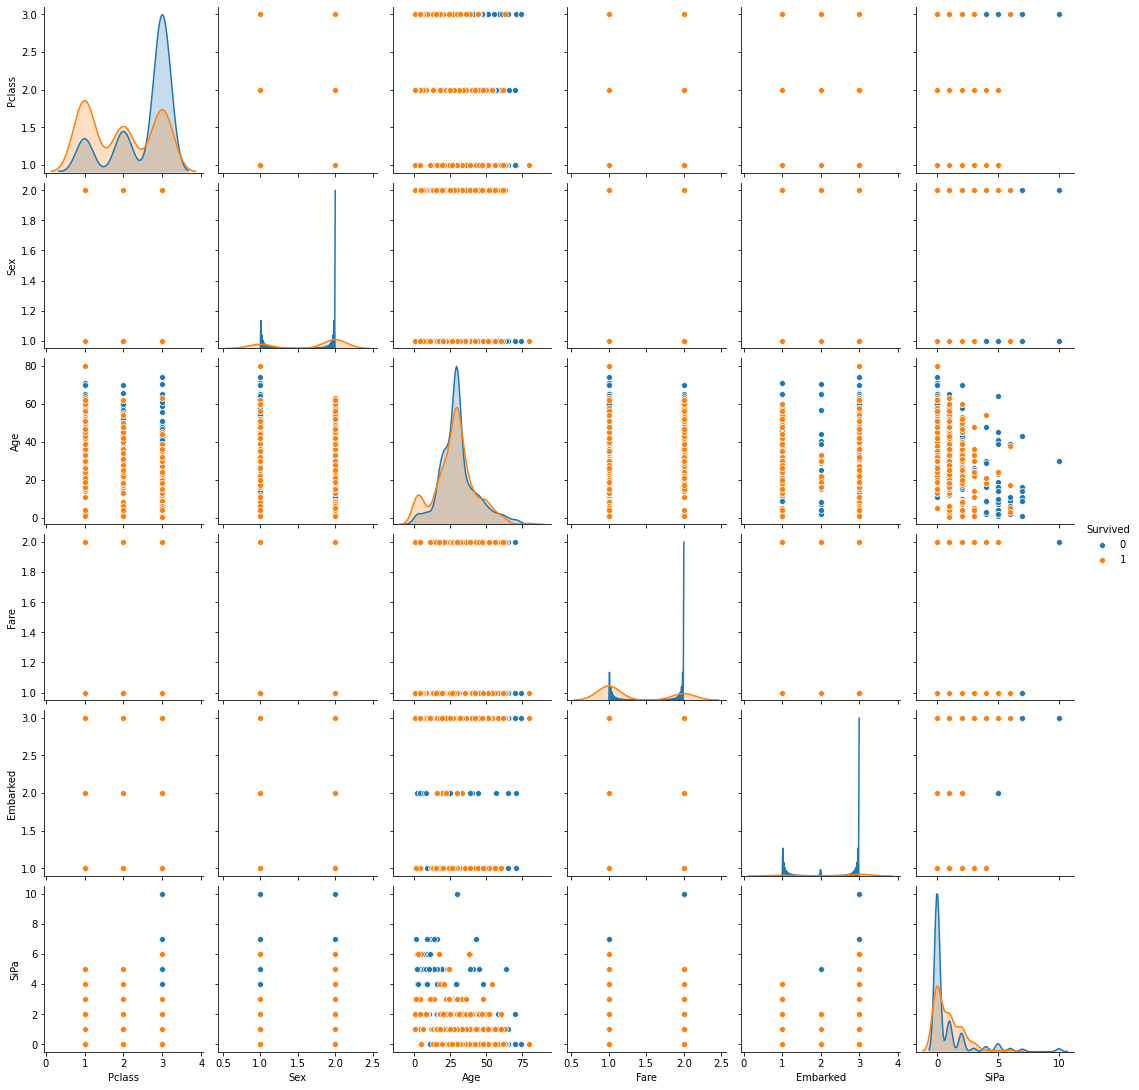

In [69]:
sns.pairplot(temp,hue='Survived')

In [13]:
from sklearn import preprocessing

In [17]:
train = temp.drop(['Survived'],axis = 1)
y = temp['Survived']
y_train = y
testT = tempT.copy()

In [18]:
train = train.drop(['SibSp','Parch','Embarked','Pclass','SiPa'],axis =1)
testT = testT.drop(['SibSp','Parch','Embarked','Pclass','SiPa'],axis =1)

In [ ]:
train['P_Sipa'] = train['Pclass'] + train['SiPa']
testT['P_Sipa'] = testT['Pclass'] + testT['SiPa']

In [19]:
x = train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(x)

In [20]:
x = testT.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_test = min_max_scaler.fit_transform(x)

In [21]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [22]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

In [23]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [24]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

In [25]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [26]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

In [27]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [30]:
clf = SVC(kernel="poly", C=0.8, probability=True)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
acc_poly_svc = round(clf.score(X_train, y_train) * 100, 2)
acc_poly_svc

78.9

In [28]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

In [29]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train) 
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [31]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines','Support Vector Machines Poly', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc,acc_poly_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

Model
Score                              
97.98                 Random Forest
97.98                 Decision Tree
87.32                           KNN
78.90  Support Vector Machines Poly
78.79           Logistic Regression
78.68       Support Vector Machines
78.00                   Naive Bayes
78.00    Stochastic Gradient Decent
77.89                    Perceptron

In [32]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
#rf = SVC(kernel="poly", C=0.8,degree=10, probability=True)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77777778 0.82022472 0.70786517 0.86516854 0.85393258 0.79775281
 0.80898876 0.71910112 0.84269663 0.82022472]
Mean: 0.8013732833957553
Standard Deviation: 0.05038949696259824


In [33]:
importances = pd.DataFrame({'feature':train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(10)

importance
feature             
Sex            0.255
Fare           0.227
Fare_log       0.219
Age_log        0.151
Age            0.148

In [34]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

97.98 %


In [35]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 79.46 %


In [36]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 80.25 %


In [37]:
y1 = np.asarray(test_dataY['Survived'])

In [38]:
from sklearn.metrics import accuracy_score, log_loss
acc = accuracy_score(y1, Y_prediction)
acc

0.8755980861244019

In [39]:
pred_y = Y_prediction.reshape(-1)
all_id = np.array(test_dataY['PassengerId'])
y_pred = pd.DataFrame(list(zip(all_id, pred_y)),columns =['PassengerId', 'Survived'])
y_pred.to_csv("/content/drive/My Drive/MY ML JOURNEY/.04_.87.csv", index=False)

In [16]:
experiment.loc[ experiment['Age'] <= 10, 'Age'] = 1
experiment.loc[(experiment['Age'] > 10) & (experiment['Age'] <= 20), 'Age'] = 2
experiment.loc[(experiment['Age'] > 20) & (experiment['Age'] <= 30), 'Age'] = 3
experiment.loc[(experiment['Age'] > 30) & (experiment['Age'] <= 40), 'Age'] = 4
experiment.loc[(experiment['Age'] > 40) & (experiment['Age'] <= 50), 'Age'] = 5
experiment.loc[(experiment['Age'] > 50) & (experiment['Age'] <= 60), 'Age'] = 6
experiment.loc[(experiment['Age'] > 60) & (experiment['Age'] <= 70), 'Age'] = 7
experiment.loc[ experiment['Age'] > 70, 'Age'] = 8

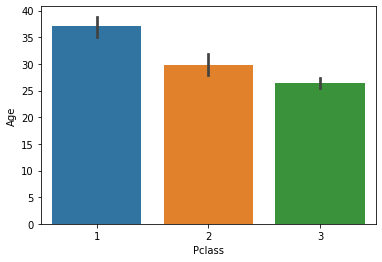

In [17]:
ax = sns.barplot(x="Pclass", y="Age", data=tr)

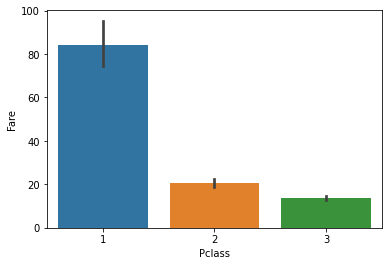

In [18]:
ax = sns.barplot(x="Pclass", y="Fare", data=tr)

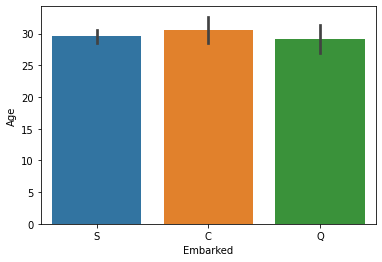

In [19]:
ax = sns.barplot(x="Embarked", y="Age", data=tr)

In [20]:
tr.head(3)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S